# CUHK-STAT3009: Homework 2 - More SVD Models **(due Nov 13)**


## **Q1: Basic Usage of SVD for Rating Prediction**

**Importing the SVD Class**

Download the `SVD` class from our GitHub repository: https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py.

**Dataset**

We will use a synthetic dataset to demonstrate the basic usage of SVD for rating prediction. The dataset consists of user ratings for various items, represented by the following DataFrame:
```python
import pandas as pd
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    'rating': [5, 3, 4, 2, 1, 3, 4, 5, 2, 3]}
df = pd.DataFrame(data)
```

**Task**

Your task is to train an SVD model with $K = 2$ and $\lambda = 0.001$ using the provided dataset and predict the ratings for the following user-item pairs:

* `user_id` = 2, `item_id` = 2
* `user_id` = 5, `item_id` = 1

Implement the SVD model, train it on the dataset, and provide the predicted ratings for the specified user-item pairs.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [69]:
## Your solution here.
## I downloaded the TabRS.py from github and uploaded to Colab
import numpy as np
import pandas as pd
from TabRS import SVD

ratings_data = {
    "user_id": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    "item_id": [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    "rating":  [5, 3, 4, 2, 1, 3, 4, 5, 2, 3],
}
df = pd.DataFrame(ratings_data)

users = sorted(df["user_id"].unique())
items = sorted(df["item_id"].unique())
user_map = {u: idx for idx, u in enumerate(users)}
item_map = {i: idx for idx, i in enumerate(items)}

X = np.column_stack([df["user_id"].map(user_map), df["item_id"].map(item_map)])
y = df["rating"].to_numpy()

model = SVD(
    n_users=len(users),
    n_items=len(items),
    K=2,
    lam=0.001,
    iterNum=30,
    verbose=1
)
model.fit(X, y)

query = pd.DataFrame({
    "user_id": [2, 5],
    "item_id": [2, 1]
})
to_predict = np.column_stack([
    query["user_id"].map(user_map),
    query["item_id"].map(item_map)
])

predictions = model.predict(to_predict)

for (u, i), r_hat in zip(query.to_numpy(), predictions):
    print(f"Predicted rating for user {u}, item {i}: {r_hat:.2f}")

Fitting Reg-SVD: K: 2, lam: 0.00100
RegSVD-ALS: 0; obj: 0.026; rmse:0.021, diff: 16.899
RegSVD-ALS: 1; obj: 0.025; rmse:0.020, diff: 0.001
RegSVD-ALS: 2; obj: 0.024; rmse:0.019, diff: 0.001
RegSVD-ALS: 3; obj: 0.024; rmse:0.018, diff: 0.001
RegSVD-ALS: 4; obj: 0.023; rmse:0.018, diff: 0.001
RegSVD-ALS: 5; obj: 0.023; rmse:0.017, diff: 0.001
RegSVD-ALS: 6; obj: 0.022; rmse:0.017, diff: 0.001
RegSVD-ALS: 7; obj: 0.021; rmse:0.016, diff: 0.001
RegSVD-ALS: 8; obj: 0.021; rmse:0.016, diff: 0.000
RegSVD-ALS: 9; obj: 0.021; rmse:0.015, diff: 0.000
RegSVD-ALS: 10; obj: 0.020; rmse:0.015, diff: 0.000
RegSVD-ALS: 11; obj: 0.020; rmse:0.015, diff: 0.000
RegSVD-ALS: 12; obj: 0.019; rmse:0.014, diff: 0.000
RegSVD-ALS: 13; obj: 0.019; rmse:0.014, diff: 0.000
RegSVD-ALS: 14; obj: 0.019; rmse:0.014, diff: 0.000
RegSVD-ALS: 15; obj: 0.018; rmse:0.013, diff: 0.000
RegSVD-ALS: 16; obj: 0.018; rmse:0.013, diff: 0.000
RegSVD-ALS: 17; obj: 0.018; rmse:0.013, diff: 0.000
RegSVD-ALS: 18; obj: 0.017; rmse:0.01

## **Q2: Lasso-SVD Recommender Systems**

**Data**

In this task, you will implement a user-item average based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**Lasso Regression**

Given a dataset of feature-vectors $\mathbf{x}_i$ and corresponding ground truth scores $y_i$, Lasso regression seeks a sparse solution by minimizing the following objective function:

$$\text{argmin}_{\mathbf{\beta}} \ \frac{1}{n} \sum_{i=1}^n ( y_i - \mathbf{\beta}^T \mathbf{x}_i )^2 + \lambda \| \mathbf{\beta} \|_1, \quad \text{where } \| \mathbf{\beta} \|_1 = \sum_{j=1}^p |\beta_j|$$

This can be efficiently solved using `sklearn.linear_model.Lasso` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)).

### **Task: Lasso Matrix Factorization (Lasso_SVD)**

**Objective**

Implement a Lasso_SVD recommender system by solving the following optimization problem:

$$\boxed{(\widehat{\mathbf P}, \widehat{\mathbf Q}) = \text{argmin}_{\mathbf{P}, \mathbf{Q} } \frac{1}{|\Omega|} \sum_{(u,i) \in \Omega} ( r_{ui} - \mathbf{p}^\intercal_u \mathbf{q}_i  )^2 + \lambda \big(  \sum_{u=1}^n \|\mathbf{p}_u\|_1 + \sum_{i=1}^m \|\mathbf{q}_i\|_1 \big)}$$

**Implementation**

Create a class `Lasso_SVD` with two methods:

1. `Lasso_SVD.fit`: Fit the parameters $\mathbf{P}$ and $\mathbf{Q}$ by solving the optimization problem above using Lasso regression.
2. `Lasso_SVD.predict`: Predict ratings using the fitted parameters: $\widehat{r}_{ui} = \widehat{\mathbf{p}}^T_u \widehat{\mathbf{q}}_i$

**Hint**: Use Alternative Least Square (ALS) logic, where each subproblem is a Lasso regression that can be solved using `sklearn.linear_model.Lasso` (previously, we use `sklearn.linear_model.Ridge`).

**Evaluation**

Print the Root Mean Squared Error (RMSE) for the testing data using the following hyperparameters:

* $(\lambda = 0.1, K = 3)$
* $(\lambda = 0.3, K = 5)$

> Implement the `Lasso_SVD` class with the required methods. The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [70]:
## Your solution here
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from tqdm import trange

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

user_to_idx = {u: i for i, u in enumerate(train['user_id'].unique())}
item_to_idx = {m: i for i, m in enumerate(train['movie_id'].unique())}

train['uid'] = train['user_id'].map(user_to_idx)
train['iid'] = train['movie_id'].map(item_to_idx)

class LassoSVD:

    def __init__(self, n_factors=10, alpha=0.1, n_epochs=5, seed=0):
        self.n_factors = n_factors
        self.alpha = alpha
        self.n_epochs = n_epochs
        self.seed = seed

    def fit(self, data):
        np.random.seed(self.seed)
        n_users = data['uid'].nunique()
        n_items = data['iid'].nunique()

        self.user_vecs = np.random.normal(0, 0.1, (n_users, self.n_factors))
        self.item_vecs = np.random.normal(0, 0.1, (n_items, self.n_factors))

        user_records = data.groupby('uid')[['iid', 'rating']].apply(lambda x: x.values.tolist())
        item_records = data.groupby('iid')[['uid', 'rating']].apply(lambda x: x.values.tolist())

        for epoch in range(self.n_epochs):

            for u in trange(n_users, desc=f"Epoch {epoch+1} - Users", leave=False):
                if u not in user_records:
                    continue
                rated = user_records[u]
                i_idx = [x[0] for x in rated]
                y = np.array([x[1] for x in rated])
                lasso_u = Lasso(alpha=self.alpha, fit_intercept=False, max_iter=1500)
                self.user_vecs[u] = lasso_u.fit(self.item_vecs[i_idx], y).coef_

            for i in trange(n_items, desc=f"Epoch {epoch+1} - Items", leave=False):
                if i not in item_records:
                    continue
                rated = item_records[i]
                u_idx = [x[0] for x in rated]
                y = np.array([x[1] for x in rated])
                lasso_i = Lasso(alpha=self.alpha, fit_intercept=False, max_iter=1500)
                self.item_vecs[i] = lasso_i.fit(self.user_vecs[u_idx], y).coef_

    def predict(self, u, i):
        if (u is None) or (i is None):
            return 3.5
        if u >= self.user_vecs.shape[0] or i >= self.item_vecs.shape[0]:
            return 3.5
        return float(np.dot(self.user_vecs[u], self.item_vecs[i]))

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(model, test_df):
    preds, truth = [], []
    for _, row in test_df.iterrows():
        u = user_to_idx.get(row['user_id'])
        i = item_to_idx.get(row['movie_id'])
        preds.append(model.predict(u, i))
        truth.append(row['rating'])
    return rmse_score(truth, preds)

for lam, k in [(0.1, 3), (0.3, 5)]:
    print(f"\nLassoSVD: α={lam}, K={k}")
    mf = LassoSVD(n_factors=k, alpha=lam, n_epochs=3)
    mf.fit(train)
    print(f"Test RMSE (α={lam}, K={k}): {evaluate_model(mf, test):.4f}")


LassoSVD: α=0.1, K=3


Epoch 1 - Items:  35%|███▍      | 1034/2984 [00:00<00:01, 1276.74it/s]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e-03, tolerance: 2.000e-03
  model = cd_fast.enet_coordinate_descent(
Epoch 1 - Items:  56%|█████▋    | 1683/2984 [00:01<00:01, 1286.10it/s]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.542e-04, tolerance: 4.000e-04
  model = cd_fast.enet_coordinate_descent(
Epoch 1 - Items:  61%|██████    | 1822/2984 [00:01<00:00, 1315.15it/s]/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: Con

Test RMSE (α=0.1, K=3): 1.4920

LassoSVD: α=0.3, K=5


Test RMSE (α=0.3, K=5): 3.7142


## **Q3: Kaggle Submission by Neural Networks**

**Task**

- Create an arbitrary Neural Network with Dense layers and Make a Submission to the Kaggle Competition: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

- Paste the submission results screenshot into this Jupyter Notebook.

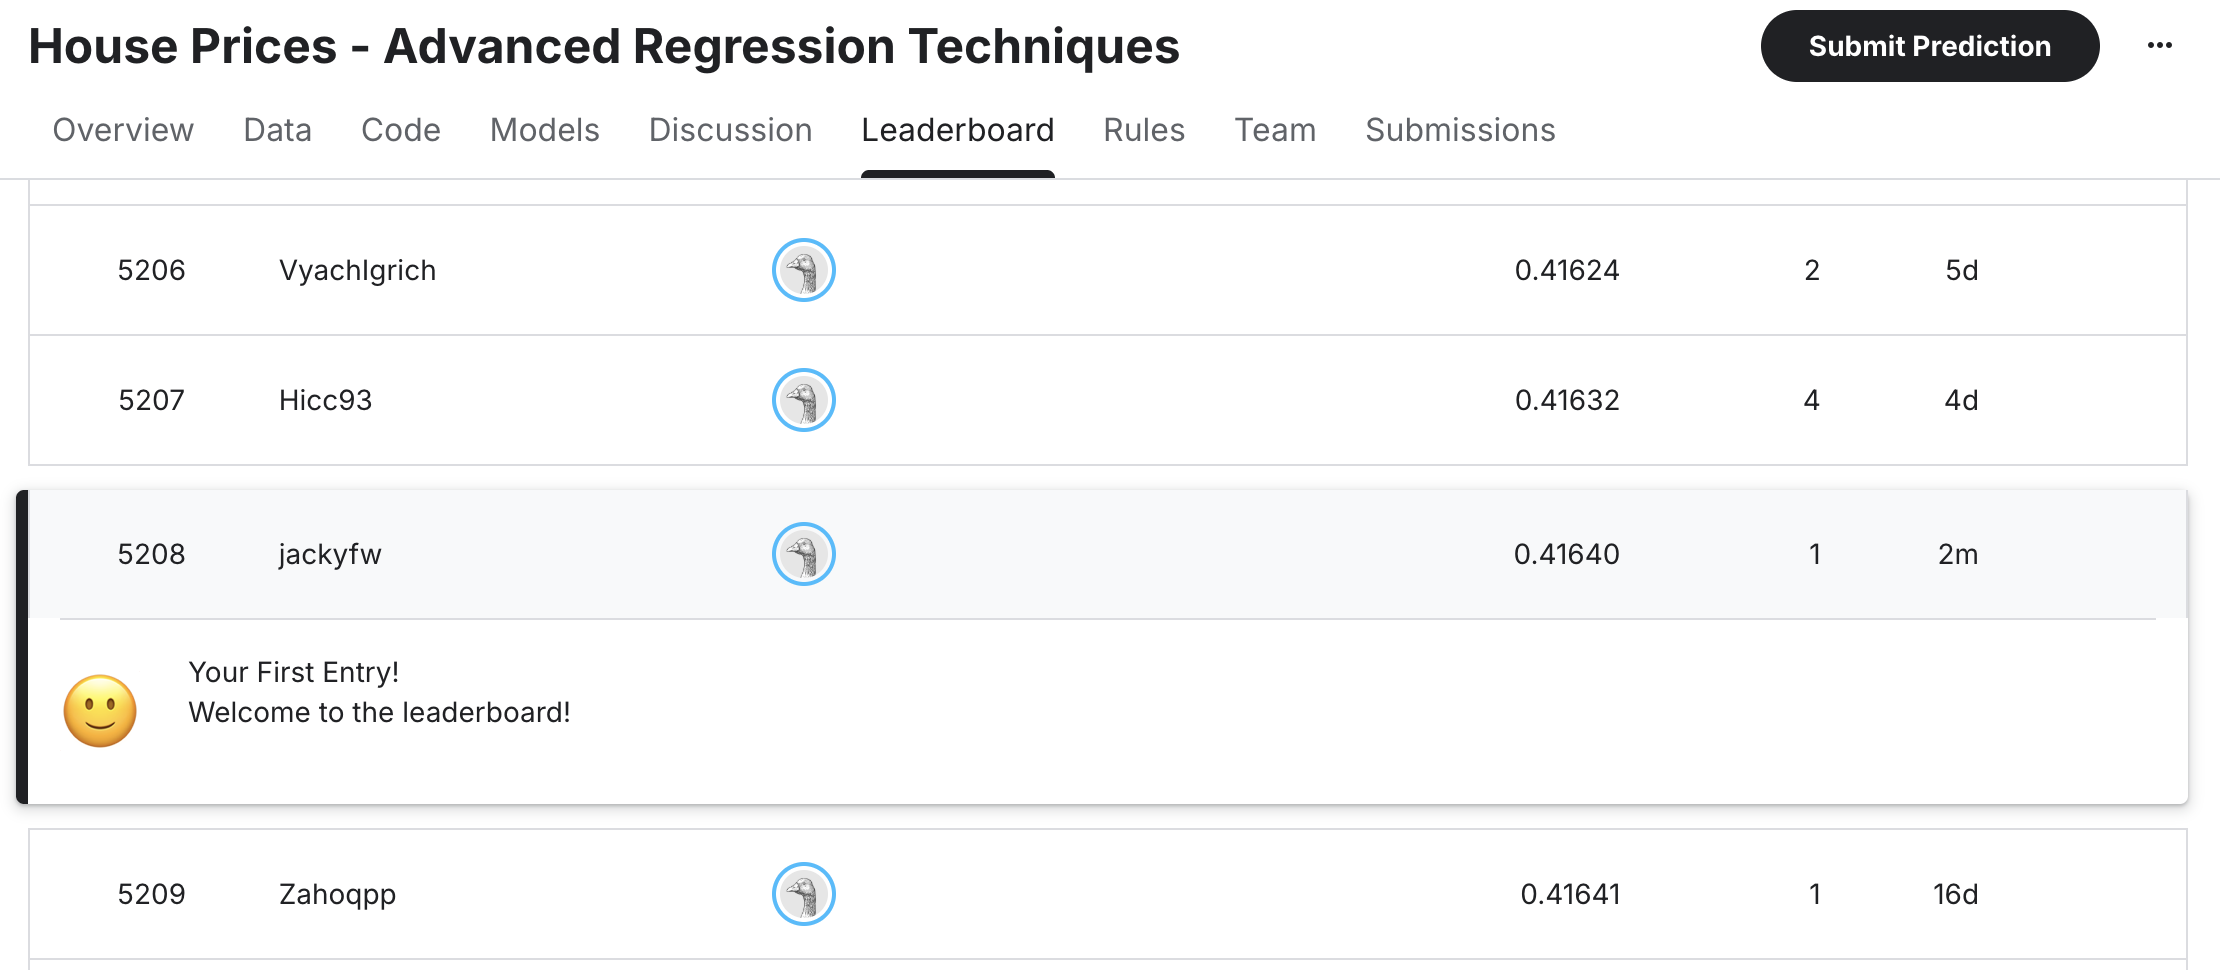

## **Q4 (Bonus): Parallel Alternating Least Squares (ALS) for Matrix Factorization**


**Background**

Recall the item and user updates for `SVD` based on ALS:

$$\mathbf{q}^{(l+1)}_i = \left(\sum_{u \in \mathcal{U}_i} \mathbf{p}^{(l)}_u (\mathbf{p}^{(l)}_u)^T + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{u \in \mathcal{U}_i} r_{ui} \mathbf{p}^{(l)}_u$$

$$\mathbf{p}^{(l+1)}_u = \left(\sum_{i \in \mathcal{I}_u} \mathbf{q}^{(l+1)}_i (\mathbf{q}^{(l+1)}_i)^\intercal + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{i \in \mathcal{I}_u} r_{ui} \mathbf{q}^{(l+1)}_i$$

The key observation is that the updates for user-$u$ and item-$i$ are independent of other users and items, respectively. Therefore, they can be performed in parallel.

Suppose you have 100 users to update, the basic ALS updates user 1, user 2, ..., user 100 sequentially in a loop. Now, suppose you have 100 CPUs, the parallel ALS can update 100 users simultaneously by distributing each user to a different CPU, significantly reducing the computation time.

**Tasks**

1. **Parallelize the `SVD.fit` method**: Revise the `SVD.fit` method (available in [repo](https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py)) to allow parallel updating of $\mathbf{p}_u$ and $\mathbf{q}_i$ using Python libraries such as [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) or [pymp](https://github.com/classner/pymp).
2. **Compare computation times**: Compare the computation time for `SVD.fit` with and without parallel computing using the `%%time` magic command (see [ref](https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook)).

In [67]:
# check number of CPUs in your PC/Node
!lscpu

Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:              6
    Model:                   79
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                0
    BogoMIPS:                4400.34
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   

In [68]:
## Your solution here
import numpy as np
import time
from multiprocessing import Pool, cpu_count

np.random.seed(42)
num_users, num_items, k_dim = 200, 150, 10
true_U = np.random.randn(num_users, k_dim)
true_V = np.random.randn(num_items, k_dim)
ratings = true_U @ true_V.T + np.random.randn(num_users, num_items) * 0.1

mask = np.random.rand(num_users, num_items) < 0.2
ratings[~mask] = np.nan


class ParallelALS:
    def __init__(self, num_users, num_items, k_dim=10, reg=0.1, n_iter=5, n_jobs=1, verbose=True):
        self.num_users = num_users
        self.num_items = num_items
        self.k_dim = k_dim
        self.reg = reg
        self.n_iter = n_iter
        self.n_jobs = n_jobs
        self.verbose = verbose

    def fit(self, ratings):
        self.ratings = ratings
        self.U_latent = np.random.randn(self.num_users, self.k_dim)
        self.V_latent = np.random.randn(self.num_items, self.k_dim)
        self.valid = ~np.isnan(ratings)

        for it in range(self.n_iter):
            if self.verbose:
                print(f"Iteration {it + 1}/{self.n_iter}")
            t0 = time.time()
            self._update_items()
            self._update_users()
            if self.verbose:
                print(f"  RMSE: {self.rmse():.4f}, Time: {time.time() - t0:.2f}s")
        return self

    def _update_items(self):
        lamI = self.reg * np.eye(self.k_dim)
        if self.n_jobs == 1:
            for j in range(self.num_items):
                idx = self.valid[:, j]
                if not np.any(idx):
                    continue
                U_tmp = self.U_latent[idx]
                r_tmp = self.ratings[idx, j]
                A = U_tmp.T @ U_tmp + lamI
                b = U_tmp.T @ r_tmp
                self.V_latent[j] = np.linalg.solve(A, b)
        else:
            with Pool(processes=min(self.n_jobs, cpu_count())) as pool:
                res = pool.map(self._update_item_task, range(self.num_items))
            for j, v_new in enumerate(res):
                if v_new is not None:
                    self.V_latent[j] = v_new

    def _update_item_task(self, j):
        lamI = self.reg * np.eye(self.k_dim)
        idx = self.valid[:, j]
        if not np.any(idx):
            return None
        U_tmp = self.U_latent[idx]
        r_tmp = self.ratings[idx, j]
        A = U_tmp.T @ U_tmp + lamI
        b = U_tmp.T @ r_tmp
        return np.linalg.solve(A, b)

    def _update_users(self):
        lamI = self.reg * np.eye(self.k_dim)
        if self.n_jobs == 1:
            for u in range(self.num_users):
                idx = self.valid[u, :]
                if not np.any(idx):
                    continue
                V_tmp = self.V_latent[idx]
                r_tmp = self.ratings[u, idx]
                A = V_tmp.T @ V_tmp + lamI
                b = V_tmp.T @ r_tmp
                self.U_latent[u] = np.linalg.solve(A, b)
        else:
            with Pool(processes=min(self.n_jobs, cpu_count())) as pool:
                res = pool.map(self._update_user_task, range(self.num_users))
            for u, u_new in enumerate(res):
                if u_new is not None:
                    self.U_latent[u] = u_new

    def _update_user_task(self, u):
        lamI = self.reg * np.eye(self.k_dim)
        idx = self.valid[u, :]
        if not np.any(idx):
            return None
        V_tmp = self.V_latent[idx]
        r_tmp = self.ratings[u, idx]
        A = V_tmp.T @ V_tmp + lamI
        b = V_tmp.T @ r_tmp
        return np.linalg.solve(A, b)

    def predict(self):
        return self.U_latent @ self.V_latent.T

    def rmse(self):
        pred = self.predict()
        return np.sqrt(np.nanmean((pred[self.valid] - self.ratings[self.valid]) ** 2))


print("Sequential ALS fitting...")
model_single = ParallelALS(num_users, num_items, k_dim=10, reg=0.1, n_iter=3, n_jobs=1)
start = time.time()
model_single.fit(ratings)
time_seq = time.time() - start

print("\nParallel ALS fitting...")
model_parallel = ParallelALS(num_users, num_items, k_dim=10, reg=0.1, n_iter=3, n_jobs=4)
start = time.time()
model_parallel.fit(ratings)
time_par = time.time() - start

print("\nResults:")
print(f"Sequential: {time_seq:.2f}s | RMSE: {model_single.rmse():.4f}")
print(f"Parallel:   {time_par:.2f}s | RMSE: {model_parallel.rmse():.4f}")
print(f"Speedup: {time_seq / time_par:.2f}× faster")



Sequential ALS fitting...
Iteration 1/3
  RMSE: 2.0343, Time: 0.02s
Iteration 2/3
  RMSE: 1.4994, Time: 0.03s
Iteration 3/3
  RMSE: 1.2782, Time: 0.02s

Parallel ALS fitting...
Iteration 1/3
  RMSE: 2.0551, Time: 0.22s
Iteration 2/3
  RMSE: 1.5295, Time: 0.21s
Iteration 3/3
  RMSE: 1.2924, Time: 0.20s

Results:
Sequential: 0.07s | RMSE: 1.2782
Parallel:   0.64s | RMSE: 1.2924
Speedup: 0.11× faster
